In [46]:
import numpy as np
import cmasher as cmr
import matplotlib.pyplot as plt
import h5py
from unyt import g, s, c, Msun, yr, Lsun, mp, G, sigma_thompson
from astropy.cosmology import Planck13 as cosmo

# set style
plt.style.use('../matplotlibrc.txt')

In [47]:
def calculate_eddington_accretion_rate(blackhole_mass, radiative_efficiency):
    return ((4*np.pi*G*blackhole_mass*mp)/(radiative_efficiency*sigma_thompson*c))

In [48]:
blackhole_mass = 1E8 * Msun
radiative_efficiency = 0.1

eddington_accretion_rate = calculate_eddington_accretion_rate(blackhole_mass, radiative_efficiency)
print(eddington_accretion_rate.to('Msun/yr'))

2.2197315367792996 Msun/yr


In [49]:
# little-h
h = 0.677

# radiative efficiency
radiative_efficiency = 0.1

# accretion rate units
blackhole_mass_units = 1E10 * Msun / h
accretion_rate_units = 6.446E23 * g/s
seed_mass = 1E5 * Msun / h

[5.04237705e+20 4.22759621e+20 5.29542123e+20 ... 2.26458938e+24
 1.11877421e+24 1.06491143e+24] g/s


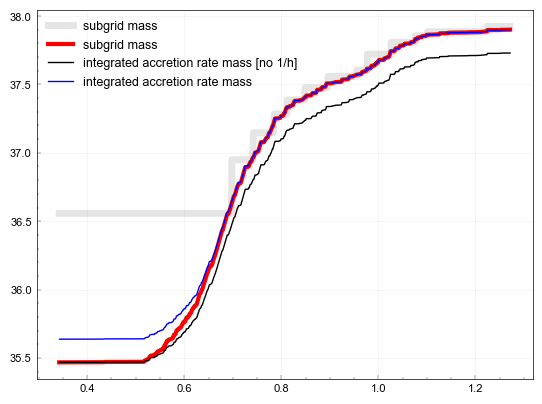

In [50]:
target_z = 5.
sim = '00'
pid = 29073816540486753

redshift_limits = [8., 5.]

data_dir = f'/Users/sw376/Dropbox/Research/data/simulations/flares/'

details = h5py.File(f'{data_dir}/blackhole_details.h5', 'r')

bh = details[sim][str(pid)]


# integrate

z = bh['z'][()]
time = cosmo.age(z)
dt = time[1:]-time[:-1]

# calculate the mass added in a particular bin


accretion_rate = bh['Mdot'][1:] * accretion_rate_units
print(accretion_rate)

mass_added = dt.to('yr').value * accretion_rate.to('Msun/yr').value * (1 - radiative_efficiency)

integrated_mass = (np.cumsum(mass_added) * Msun) + seed_mass



plt.plot(time, np.log10(bh['BH_Particle_Mass'][()] * blackhole_mass_units), c='k', lw=5, alpha=0.1, label='subgrid mass')
plt.plot(time, np.log10(bh['BH_Subgrid_Mass'][()] * blackhole_mass_units), c='r', lw=3, label='subgrid mass')
plt.plot(time[1:], np.log10(integrated_mass), c='k', lw=1, label='integrated accretion rate mass [no 1/h]')
plt.plot(time[1:], np.log10(integrated_mass/h), c='b', lw=1, label='integrated accretion rate mass')
plt.legend()
plt.show()


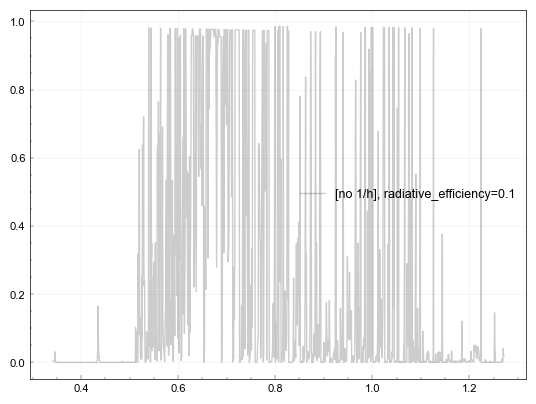

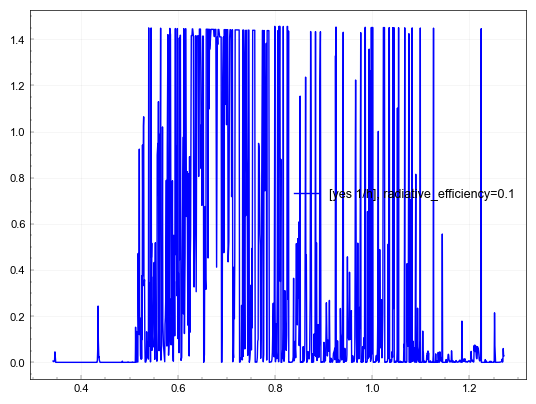

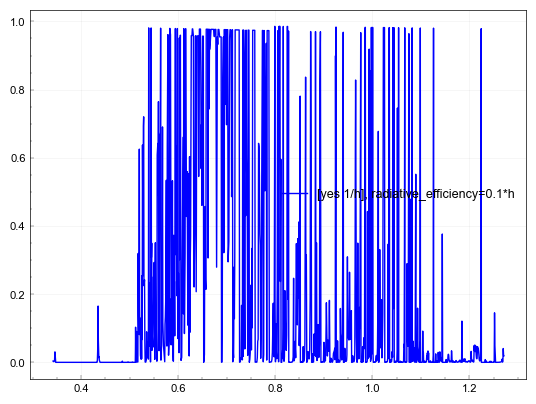

In [62]:


eddington_accretion_rate = calculate_eddington_accretion_rate(bh['BH_Subgrid_Mass'][()] * blackhole_mass_units, radiative_efficiency)

accretion_rate = bh['Mdot'][()] * accretion_rate_units

plt.plot(time, accretion_rate/eddington_accretion_rate, c='k', lw=1, alpha=0.2, label='[no 1/h], radiative_efficiency=0.1')
plt.legend()
plt.show()

plt.plot(time, (accretion_rate/h)/eddington_accretion_rate, c='b', lw=1, label='[yes 1/h], radiative_efficiency=0.1')
plt.legend()
plt.show()


eddington_accretion_rate = calculate_eddington_accretion_rate(bh['BH_Subgrid_Mass'][()] * blackhole_mass_units, radiative_efficiency*h)

plt.plot(time, (accretion_rate/h)/eddington_accretion_rate, c='b', lw=1, label='[yes 1/h], radiative_efficiency=0.1*h')
plt.legend()
plt.show()


